Dataset: https://universe.roboflow.com/project-ddrone/datasetdrone-trv98/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

### Download and Prepare data

In [1]:
from pathlib import Path

dataset_path = Path('YOLOV5_obj_tracking')
dataset_path.mkdir(parents=True, exist_ok=True)
dataset_path

PosixPath('YOLOV5_obj_tracking')

In [2]:
!pwd

/content


In [3]:
%cd YOLOV5_obj_tracking

/content/YOLOV5_obj_tracking


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i3Jz4jR0aLdI6sQdKfev")
project = rf.workspace("project-ddrone").project("datasetdrone-trv98")
version = project.version(29)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to datasetDrone-29 in yolov5pytorch:: 100%|██████████| 13676/13676 [00:03<00:00, 3477.93it/s]


In [5]:
import os
from pathlib import Path
total_train = Path('/content/YOLOV5_obj_tracking/datasetDrone-29/train/images')
total_val = Path('/content/YOLOV5_obj_tracking/datasetDrone-29/valid/images')
total_test = Path('/content/YOLOV5_obj_tracking/datasetDrone-29/test/images')

total_train = os.listdir(total_train)
total_val = os.listdir(total_val)
total_test = os.listdir(total_test)

print(f'Total images in Train folder : {len(total_train)}\nTotal images in Val folder : {len(total_val)}\nTotal images in Test folder : {len(total_test)}')

Total images in Train folder : 5367
Total images in Val folder : 706
Total images in Test folder : 759


In [6]:
for dirpath, dirnames, filenames in os.walk('/content/YOLOV5_obj_tracking/datasetDrone-29'):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 3 directories and 3 images in '/content/YOLOV5_obj_tracking/datasetDrone-29'.
There are 2 directories and 0 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/test'.
There are 0 directories and 759 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/test/labels'.
There are 0 directories and 759 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/test/images'.
There are 2 directories and 0 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/valid'.
There are 0 directories and 706 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/valid/labels'.
There are 0 directories and 706 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/valid/images'.
There are 2 directories and 0 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/train'.
There are 0 directories and 5367 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/train/labels'.
There are 0 directories and 5367 images in '/content/YOLOV5_obj_tracking/datasetDrone-29/train/images'.


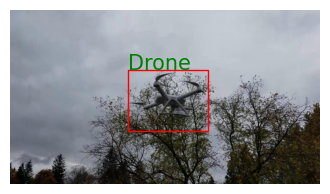

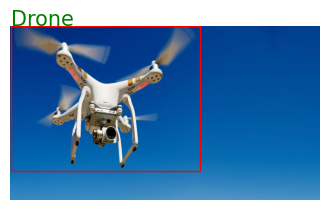

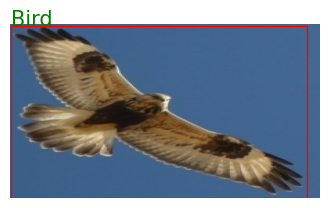

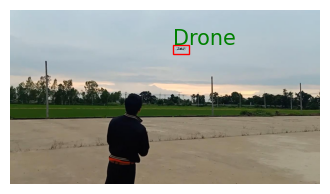

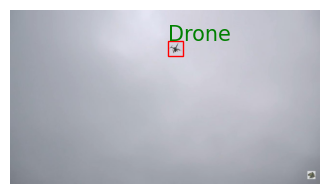

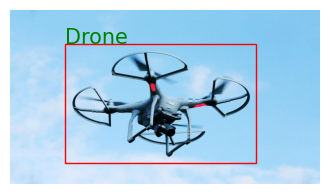

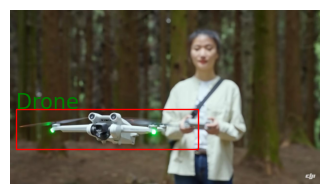

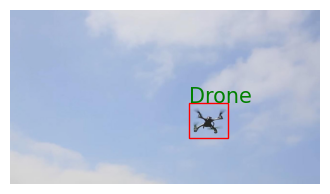

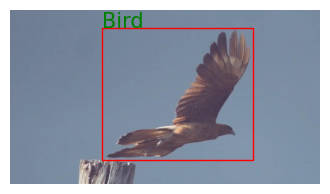

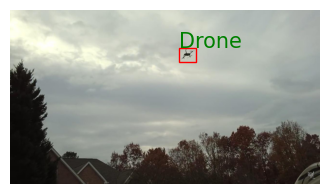

In [7]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to YOLOv5 train set
train_images_dir = "/content/YOLOV5_obj_tracking/datasetDrone-29/train/images"
train_labels_dir = "/content/YOLOV5_obj_tracking/datasetDrone-29/train/labels"

class_names = ['Airplane', 'Bird', 'Drone', 'Helicopter']

# Get list of image files
image_files = os.listdir(train_images_dir)

# Choose 10 random images
random_images = random.sample(image_files, 10)

# Plot images with bounding boxes
for image_name in random_images:
    image_path = os.path.join(train_images_dir, image_name)
    label_path = os.path.join(train_labels_dir, image_name.replace(".jpg", ".txt"))

    # Read image
    image = Image.open(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(image)

    # Read bounding box annotations
    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            #print(class_id)
            x_min = (x_center - width / 2) * image.width
            y_min = (y_center - height / 2) * image.height
            rect_width = width * image.width
            rect_height = height * image.height

            # Create a Rectangle patch
            rect = patches.Rectangle((x_min, y_min), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            plt.gca().add_patch(rect)
            class_name = class_names[int(class_id)]
            plt.text(x_min, y_min - 2, class_name, fontsize=15, color='g')


    plt.axis('off')
    plt.show()


In [8]:
!pwd

/content/YOLOV5_obj_tracking


Class Counts: defaultdict(<class 'int'>, {'Drone': 3673, 'Airplane': 536, 'Helicopter': 806, 'Bird': 872})


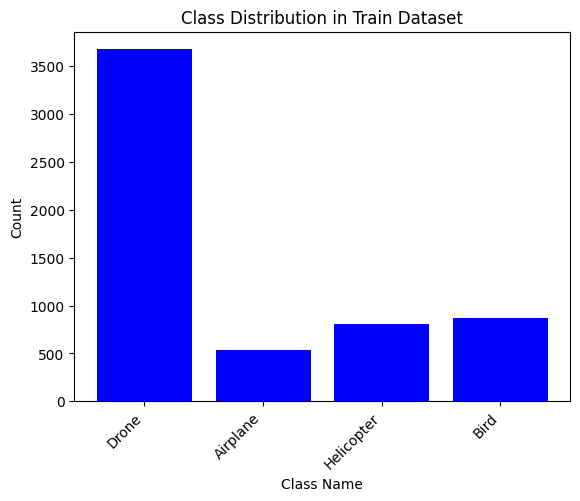

In [9]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

def read_class_names(class_names_file):
    with open(class_names_file, 'r') as file:
        class_names = [line.strip() for line in file]
    return class_names

def count_classes_in_dataset(label_dir, class_names):
    class_counts = defaultdict(int)

    # Loop through each label file in the directory
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            label_path = os.path.join(label_dir, label_file)

            # Read YOLO label file
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Extract class information and count occurrences
            for line in lines:
                class_id, _, _, _, _ = map(float, line.split())
                class_id = int(class_id)
                class_name = class_names[class_id]
                class_counts[class_name] += 1

    return class_counts

def visualize_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.bar(classes, counts, color='blue')
    plt.xlabel('Class Name')
    plt.ylabel('Count')
    plt.title(f'Class Distribution in {title} Dataset')
    plt.xticks(rotation=45, ha='right')  # Rotate class names for better visibility
    plt.show()

# usage
label_directory = 'datasetDrone-29/train/labels'  # Replace with the path to your test label directory
class_names_file = 'class_names.txt'  # Replace with the path to your class names file
class_names = read_class_names(class_names_file)

class_counts = count_classes_in_dataset(label_directory, class_names)
print("Class Counts:", class_counts)

# Optional: Visualize the class distribution
visualize_class_distribution(class_counts, title='Train')


Class Counts: defaultdict(<class 'int'>, {'Drone': 452, 'Helicopter': 124, 'Airplane': 85, 'Bird': 109})


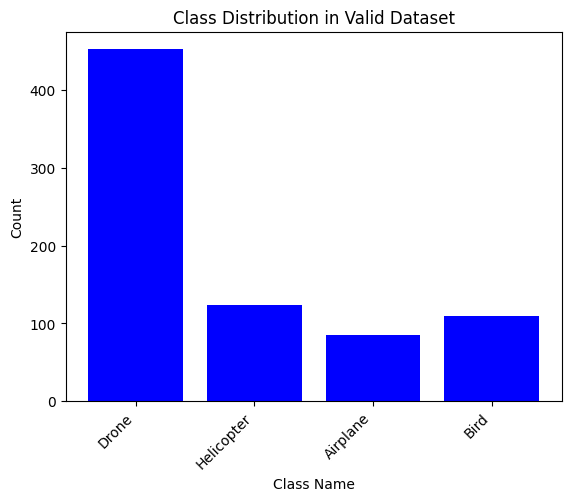

In [10]:
label_directory = 'datasetDrone-29/valid/labels'  # Replace with the path to your test label directory
class_names_file = 'class_names.txt'  # Replace with the path to your class names file
class_names = read_class_names(class_names_file)

class_counts = count_classes_in_dataset(label_directory, class_names)
print("Class Counts:", class_counts)

# Optional: Visualize the class distribution
visualize_class_distribution(class_counts, title='Valid')

In [11]:
!pwd

/content/YOLOV5_obj_tracking


In [12]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 79), reused 99 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 27.97 MiB/s, done.
Resolving deltas: 100% (11608/11608), done.


In [13]:
%cd yolov5

/content/YOLOV5_obj_tracking/yolov5


In [14]:
!pwd

/content/YOLOV5_obj_tracking/yolov5


In [15]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
!pwd

/content/YOLOV5_obj_tracking/yolov5


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasetDrone-29 # dataset root dir
train: train/images # train images (relative to 'path')
val: valid/images # val images (relative to 'path')
test: test/images # test images

# Classes
names:
  0: Airplane
  1: Bird
  2: Drone
  3: Helicopter

In [16]:
!python train.py --batch 16 --epochs 25 --data train_data.yaml --name RESULTS --patience 3

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      17/24      3.56G    0.02569   0.009108   0.003126         35        640:  64% 215/336 [01:55<01:11,  1.68it/s]/content/YOLOV5_obj_tracking/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      17/24      3.56G    0.02569   0.009105   0.003127         37        640:  64% 216/336 [01:56<01:35,  1.26it/s]/content/YOLOV5_obj_tracking/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      17/24      3.56G     0.0257   0.009103    0.00313         38        640:  65% 217/336 [01:56<01:16,  1.56it/s]/content/YOLOV5_obj_tracking/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

In [17]:
!python val.py --data train_data.yaml --weights runs/train/RESULTS/weights/best.pt --batch-size 16 --img 640 --conf-thre 0.3 --iou-thres 0.6


val: data=train_data.yaml, weights=['runs/train/RESULTS/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.3 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/YOLOV5_obj_tracking/datasetDrone-29/valid/labels.cache... 706 images, 0 backgrounds, 0 corrupt: 100% 706/706 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 45/45 [00:11<00:00,  4.01it/s]
                   all        706        770      0.968      0.958      0.977      0.794
              Airplane       

In [18]:
!python val.py --data test_data.yaml --weights runs/train/RESULTS/weights/best.pt --batch-size 16 --img 640 --conf-thre 0.3 --iou-thres 0.6


val: data=test_data.yaml, weights=['runs/train/RESULTS/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.3 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/YOLOV5_obj_tracking/datasetDrone-29/test/labels... 759 images, 0 backgrounds, 0 corrupt: 100% 759/759 [00:01<00:00, 635.35it/s]
val: New cache created: /content/YOLOV5_obj_tracking/datasetDrone-29/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 48/48 [00:11<00:00,  4.28it/s]
                   all        

In [19]:
!python detect.py --weights runs/train/RESULTS/weights/best.pt --img 416 --conf 0.5 --source ../datasetDrone-29/test/images


detect: weights=['runs/train/RESULTS/weights/best.pt'], source=../datasetDrone-29/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/759 /content/YOLOV5_obj_tracking/datasetDrone-29/test/images/00000001_jpeg.rf.ac09d2b0bcf14c33b6a1a99063a1eb5d.jpg: 256x416 1 Helicopter, 26.8ms
image 2/759 /content/YOLOV5_obj_tracking/datasetDrone-29/test/images/00000020_jpg.rf.43311fa6d302e88c843f

In [21]:
cd ..

/content/YOLOV5_obj_tracking


In [23]:
!zip -r '../yolov5_drone.zip' yolov5

  adding: yolov5/ (stored 0%)
  adding: yolov5/README.zh-CN.md (deflated 76%)
  adding: yolov5/.github/ (stored 0%)
  adding: yolov5/.github/dependabot.yml (deflated 52%)
  adding: yolov5/.github/ISSUE_TEMPLATE/ (stored 0%)
  adding: yolov5/.github/ISSUE_TEMPLATE/question.yml (deflated 56%)
  adding: yolov5/.github/ISSUE_TEMPLATE/feature-request.yml (deflated 61%)
  adding: yolov5/.github/ISSUE_TEMPLATE/bug-report.yml (deflated 60%)
  adding: yolov5/.github/ISSUE_TEMPLATE/config.yml (deflated 47%)
  adding: yolov5/.github/workflows/ (stored 0%)
  adding: yolov5/.github/workflows/format.yml (deflated 61%)
  adding: yolov5/.github/workflows/merge-main-into-prs.yml (deflated 65%)
  adding: yolov5/.github/workflows/codeql-analysis.yml (deflated 51%)
  adding: yolov5/.github/workflows/stale.yml (deflated 58%)
  adding: yolov5/.github/workflows/docker.yml (deflated 66%)
  adding: yolov5/.github/workflows/cla.yml (deflated 55%)
  adding: yolov5/.github/workflows/links.yml (deflated 63%)
  add